<a href="https://colab.research.google.com/github/nimrat-kaur/FakeNews/blob/main/Fake_News_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fake News Prediction using Machine Learning and NLP**

Dataset Description

train.csv attributes:

id: unique id for a news article

title: the title of a news article

author: author of the news article

text: the text of the article; could be incomplete

label: 
1: unreliable
0: reliable

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import re #Regular expressions 
import nltk #Natural Language Toolkit
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
import itertools

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### **PRE-PROCESSING OF DATA**

In [ ]:
# load dataset
df = pd.read_csv("/content/drive/MyDrive/quants/train.csv")
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
df.shape

(20800, 5)

In [ ]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
# replacing the null values with empty string
df = df.fillna(" ")

In [ ]:
df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [ ]:
# All text fields(Title,Author&text) will be used to train our model 
df['text_corpus'] = df['author']+' '+df['title']+' '+df['text']

In [ ]:
df.head()

,id,title,author,text,label,text_corpus
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy Iranian woman jailed for fictio...


In [ ]:
df['label'].value_counts()
# Dataset is balanced

1    10413
0    10387
Name: label, dtype: int64

### **STEMMING**

Stemming is the process of reducing a word to its Root word.

For example:
eating, eats, eaten --> eat

In [ ]:
port_stem = PorterStemmer()

In [ ]:
def stemming(content):

    # Remove Special Characters
    # Numbers or punctuations will be replaced by a whitespace
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)

    # Converting all letters to lowercase 
    stemmed_content = stemmed_content.lower()

    # Converting all to a splitted case or a list
    stemmed_content = stemmed_content.split()

    # Apply stemming to get root words + remove stopwords as well
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]

    # Join all the words in final content
    stemmed_content = ' '.join(stemmed_content)

    return stemmed_content

In [ ]:
df['text_corpus'] = df['text_corpus'].apply(stemming)

In [ ]:
print(df['text_corpus'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2        consortiumnew com truth might get fire truth m...
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799    david swanson keep f aliv david swanson author...
Name: text_corpus, Length: 20800, dtype: object


In [ ]:
# Separate data and label
X = df['text_corpus'].values
Y = df['label'].values

In [ ]:
print(X)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet hous dem aid even see comey letter jason chaffetz tweet darrel lucu octob subscrib jason chaffetz stump american fork utah imag courtesi michael jolley avail creativ common licens apolog keith olbermann doubt worst person world week fbi director jame comey accord hous democrat aid look like also know second worst person well turn comey sent infam letter announc fbi look email may relat hillari clinton email server rank democrat relev committe hear comey found via tweet one republican committe chairmen know comey notifi republican chairmen democrat rank member hous intellig judiciari oversight committe agenc review email recent discov order see contain classifi inform long letter went oversight committe chairman jason chaffetz set polit world ablaz tweet fbi dir inform fbi learn exist email appear pertin investig case reopen jason chaffetz jasoninthehous octob cours know case comey actual say review email light unrel 

### **TF-IDF (Term Frequency, Inverse Document Frequency)**
TF-IDF Vectorizer will convert textual data to numerical data

In [ ]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [ ]:
print(X)

  (0, 109752)	0.049158312425168854
  (0, 109697)	0.0190646711515277
  (0, 108742)	0.04416544119908134
  (0, 108738)	0.09477494042884232
  (0, 108695)	0.03758488097939004
  (0, 108658)	0.01130614774071694
  (0, 108007)	0.017092546683505856
  (0, 107190)	0.017105936674103112
  (0, 107099)	0.012543234221230963
  (0, 107013)	0.029126417104928328
  (0, 106934)	0.012863319680563097
  (0, 106734)	0.011771716334271506
  (0, 105884)	0.025727197929110487
  (0, 105848)	0.031296701378124764
  (0, 104837)	0.02153649554212262
  (0, 103422)	0.06544555398259812
  (0, 102736)	0.03314918847150756
  (0, 102485)	0.01639612818098454
  (0, 101717)	0.038071924979380216
  (0, 101077)	0.011082403436475742
  (0, 101067)	0.0432044670628921
  (0, 101014)	0.13602128375819167
  (0, 100866)	0.0713092337063475
  (0, 99577)	0.03944988916619374
  (0, 99009)	0.027120358929731154
  :	:
  (20799, 7470)	0.010635431711878486
  (20799, 7143)	0.02816704434978389
  (20799, 6848)	0.03959171777516513
  (20799, 6810)	0.0253655855

### **Modeling & Model Evaluation**

In [ ]:
# Splitting the data into test and train datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.18, stratify=Y, random_state=124)

#### **Logistic Regression**


In [ ]:
# Training the model
model1 = LogisticRegression()
model1.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
# Accuracy Score on Training Data
X_train_prediction = model1.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy score on the training data: ',training_data_accuracy)

# Accuracy Score on Test Data
X_test_prediction = model1.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score on the test data: ',test_data_accuracy)

Accuracy score on the training data:  0.9783067542213884
Accuracy score on the test data:  0.9610042735042735


In [ ]:
# Function to plot confusion Matrix
def plot_confusion_matrix(cm, 
                          classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, cm[i, j],horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

Confusion matrix, without normalization


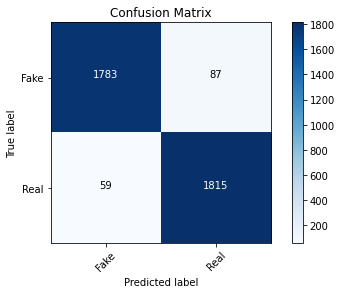

In [ ]:
cm = metrics.confusion_matrix(Y_test, X_test_prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [ ]:
# Classification report for test data
print(classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1870
           1       0.95      0.97      0.96      1874

    accuracy                           0.96      3744
   macro avg       0.96      0.96      0.96      3744
weighted avg       0.96      0.96      0.96      3744



#### **Multinomial Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(X_train, Y_train)

MultinomialNB()

In [ ]:
# Accuracy Score on Training Data
X_train_prediction1 = classifier.predict(X_train)
training_data_accuracy1 = accuracy_score(X_train_prediction1, Y_train)

print('Accuracy score on the training data: ',training_data_accuracy1)

# Accuracy Score on Test Data
X_test_prediction1 = classifier.predict(X_test)
test_data_accuracy1 = accuracy_score(X_test_prediction1, Y_test)

print('Accuracy score on the test data: ',test_data_accuracy1)

Accuracy score on the training data:  0.9174484052532833
Accuracy score on the test data:  0.8872863247863247


Confusion matrix, without normalization


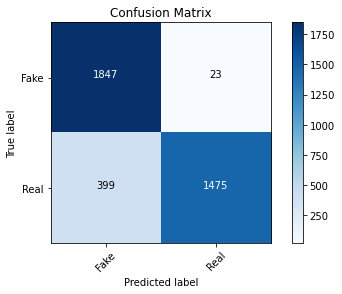

In [ ]:
cm1 = metrics.confusion_matrix(Y_test, X_test_prediction1)
plot_confusion_matrix(cm1, classes=['Fake', 'Real'])

In [ ]:
# Classification report for test data
print(classification_report(Y_test, X_test_prediction1))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90      1870
           1       0.98      0.79      0.87      1874

    accuracy                           0.89      3744
   macro avg       0.90      0.89      0.89      3744
weighted avg       0.90      0.89      0.89      3744



#### **Support Vector Machine**

In [ ]:
from sklearn.svm import SVC
classifier2 = SVC(kernel = 'linear', random_state = 0)
classifier2.fit(X_train, Y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
# Accuracy Score on Training Data
X_train_prediction2 = classifier2.predict(X_train)
training_data_accuracy2 = accuracy_score(X_train_prediction2, Y_train)

print('Accuracy score on the training data: ',training_data_accuracy2)

# Accuracy Score on Test Data
X_test_prediction2 = classifier2.predict(X_test)
test_data_accuracy2 = accuracy_score(X_test_prediction2, Y_test)

print('Accuracy score on the test data: ',test_data_accuracy2)

Accuracy score on the training data:  0.9939610694183865
Accuracy score on the test data:  0.9730235042735043


Confusion matrix, without normalization


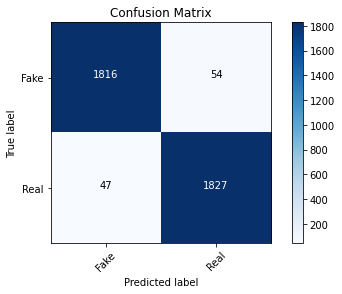

In [ ]:
cm2 = metrics.confusion_matrix(Y_test, X_test_prediction2)
plot_confusion_matrix(cm2, classes=['Fake', 'Real'])

In [ ]:
# Classification report for test data
print(classification_report(Y_test, X_test_prediction2))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1870
           1       0.97      0.97      0.97      1874

    accuracy                           0.97      3744
   macro avg       0.97      0.97      0.97      3744
weighted avg       0.97      0.97      0.97      3744



##### **MODEL COMPARISON**
Logistic Regression : Accuracy is 0.96

Multinomial Naive Bayes : Accuracy is 0.89

Support Vector Machine : Accuracy is 0.97

### **Building a Predictive System**

In [ ]:
def predict(index):
  X_new = X_test[index]
  prediction = classifier2.predict(X_new)
  if (prediction[0] == 0):
    print('The news in Real')
  else:
    print('The news is Fake and Unreliable')

In [ ]:
predict(2222)

The news is Fake and Unreliable


In [ ]:
df[2222:2223]

,id,title,author,text,label,text_corpus
2222,2222,30+ Crazy Japanese Inventions That Are… Simply...,Matthew Sison,Think you have witnessed enough amazing invent...,1,matthew sison crazi japanes invent simpli awes...


In [ ]:
predict(95)

The news in Real


In [ ]:
df[95:96]

,id,title,author,text,label,text_corpus
95,95,White House Confirms More Gitmo Transfers Befo...,Edwin Mora,President Barack Obama will likely release mor...,0,edwin mora white hous confirm gitmo transfer o...


In [ ]:
predict(505)

The news in Real


In [ ]:
df[505:506]

,id,title,author,text,label,text_corpus
505,505,"Bobby Hutcherson, Vibraphonist With Coloristic...",Nate Chinen,"Bobby Hutcherson, one of the most admired and ...",0,nate chinen bobbi hutcherson vibraphonist colo...
